# Importance Sampling with Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Target distribution and proposal distribution

In [2]:
# Define the target distribution and proposal distribution
def normal_distribution_pdf(x, mean, variance):
    """
    Calculate the PDF of a normal distribution at a point
    :param x: the point to evaluate PDF
    :param mean: the mean of the normal distribution
    :param variance: the variance of the normal distribution
    :return: the PDF
    """
    return (1 / np.sqrt(2 * np.pi * variance)) * np.exp(- ((x - mean) ** 2) / (2 * variance))

def uniform_distribution_pdf(x, low, high):
    """
    Calculate the PDF of a uniform distribution
    :param x: the point to evaluate PDF
    :param low: a
    :param high: b
    :return: the uniform PDF
    """
    if type(x) is np.ndarray:
        result = []
        for item in x:
            result.append(1 / (high - low) if low <= item <= high else 0)
        return np.array(result, dtype=float)
    return 1 / (high - low) if low <= x <= high else 0

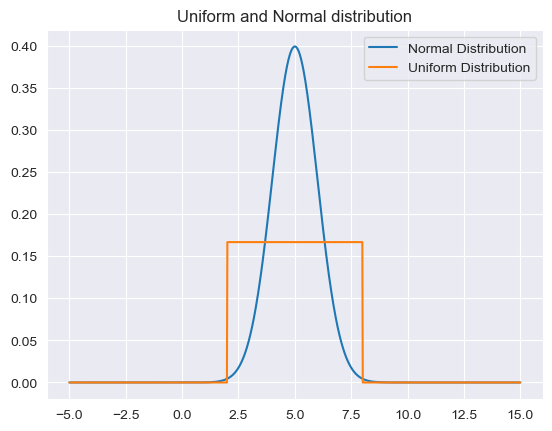

In [20]:
# Draw the distribution
MEAN = 5
VARIANCE = 1
LOW = 2
HIGH = 8

# Define the range
x = np.linspace(-5, 15, 1000)
pdf_normal = normal_distribution_pdf(x, mean=MEAN, variance=VARIANCE)
pdf_uniform = uniform_distribution_pdf(x, low=LOW, high=HIGH)

# Draw the normal PDF
plt.plot(x, pdf_normal, label='Normal Distribution')
plt.plot(x, pdf_uniform, label='Uniform Distribution')
plt.legend()
plt.title('Uniform and Normal distribution')
plt.savefig('figures/Importance Sampling.png')
plt.show()

# Perform Importance Sampling to calculate the mean of the normal distribution

In [21]:
# Generate samples from uniform distribution
z = np.random.uniform(low=LOW, high=HIGH, size=1000)

# Calculate the mean
weights_and_values = z * (normal_distribution_pdf(z, mean=MEAN, variance=VARIANCE)
                          / uniform_distribution_pdf(z, low=LOW, high=HIGH))

# Calculate the mean
mean = weights_and_values.mean()
print(f"The estimated mean of the distribution is {mean}")

The estimated mean of the distribution is 4.9102771284623925
